In [5]:
from google.colab import files
uploaded = files.upload()


Saving Dataset (1).csv to Dataset (1).csv


-----------------------------------------------------------------------------------TASK 1-------------------------------------------------------------------------------------

In [6]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)
import numpy as np
student_data = pd.read_csv("Dataset (1).csv")
print(student_data.iloc[0:5,0:10])
print(student_data.iloc[0:5,10:20])
print(student_data.iloc[0:5,20:30])
print(student_data.iloc[0:5,30:33])


  school sex address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason
0     GP   F       U     GT3       A     4   4.0  at_home   teacher  course
1     GP   F       U     GT3       T     1   1.0  at_home     other  course
2     GP   F       U     LE3       T     1   1.0  at_home     other   other
3     GP   F       U     GT3       T     4   2.0   health  services    home
4     GP   F       U     GT3       T     3   3.0    other     other    home
  guardian  traveltime  failures schoolsup famsup paid activities nursery  \
0   mother         2.0         0       yes     no   no         no     yes   
1   father         NaN         0        no    yes   no         no      no   
2   mother         1.0         0       yes     no   no         no     yes   
3   mother         1.0         0        no    yes   no        yes     yes   
4   father         1.0         0        no    yes   no         no     yes   

  higher internet  
0    yes       no  
1    yes      yes  
2    yes      yes  
3

In [7]:
#isolating columns those with values not an integer
print(student_data.iloc[:,0:33].dtypes)

school         object
sex            object
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu          float64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
famrel          int64
freetime      float64
goout           int64
Dalc            int64
health          int64
absences      float64
G1              int64
G2            float64
G3              int64
Feature_1     float64
Feature_2     float64
Feature_3     float64
romantic       object
dtype: object


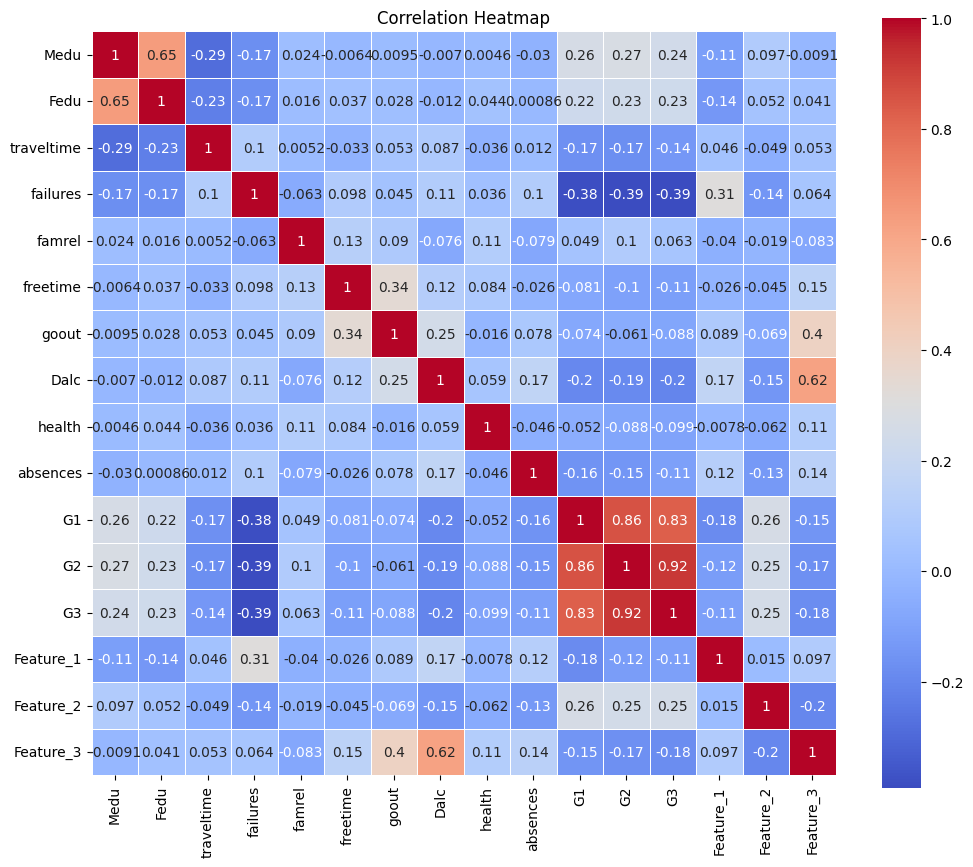

In [8]:
import pandas as pd
import numpy as np
student_data = pd.read_csv("Dataset (1).csv")
%pip install seaborn matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
#Making a heatmap for columns with numeric values
# Drop non-numeric columns
numeric_cols = student_data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title("Correlation Heatmap")
plt.show()

![image.png](attachment:image.png)


Using this heat map we see that-
1) Feature 1 relates most to  failure.
So Feature_1 is something keeping track of failures in the class so it should be Academic_Risk factor.
2) Feature 2  relates most to G1,G2,G3.
So Feature_2 is performance_index of the year
3) Feature 3  relates most to gout , dalc,health , absence.
So Feature_3 is Lifestyle_Risk_Index.

-----------------------------------------------------------------------------------TASK 2-------------------------------------------------------------------------------------


Identifying and Handling Missing values

In [9]:
print(student_data.info())
print(student_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     599 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        576 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  576 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      573 non-null    object 
 19  internet    649 non-null    o

In [10]:
data_null=student_data.columns[student_data.isnull().any()]
print(data_null)

Index(['famsize', 'Fedu', 'traveltime', 'higher', 'freetime', 'absences', 'G2',
       'Feature_1', 'Feature_2', 'Feature_3'],
      dtype='object')


Not all columns have missing values thus we see first which columns contain missing values


1)famsize-
We will use the RandomForestClassifier to first detect the features that are likely to affect famsize and then predict the missing values


In [11]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
train_data = student_data[student_data['famsize'].notnull()]
X = train_data.drop(columns=['famsize'])
y = train_data['famsize']
X_encoded = pd.get_dummies(X)
X_encoded, _ = X_encoded.align(X_encoded, join='left', axis=1)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_encoded, y)
importances = pd.Series(clf.feature_importances_, index=X_encoded.columns)
important_features = importances.sort_values(ascending=False).head(10)
print("Top features affecting famsize:\n", important_features)
missing_data = student_data[student_data['famsize'].isnull()]
X_missing = pd.get_dummies(missing_data.drop(columns=['famsize']))
X_missing = X_missing.reindex(columns=X_encoded.columns, fill_value=0)
predicted_famsize = clf.predict(X_missing)
student_data.loc[missing_data.index, 'famsize'] = predicted_famsize

Top features affecting famsize:
 G1           0.051047
G2           0.050316
absences     0.049161
G3           0.047868
freetime     0.043470
Feature_3    0.042502
Feature_1    0.040347
Fedu         0.037175
health       0.033937
goout        0.031589
dtype: float64


2)Fedu

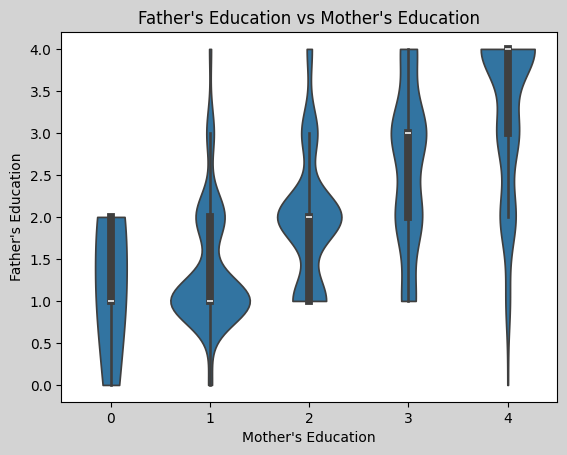

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(facecolor="lightgray")
sns.violinplot(x=student_data["Medu"],y=student_data["Fedu"],cut=0)

plt.xlabel("Mother's Education")
plt.ylabel("Father's Education")
plt.title("Father's Education vs Mother's Education")
plt.show()



This roughly  explains why fedu is related to Medu.. Leaving some irreugalarities that are bound to occur the data speaks that higher the Medu is higher the Fedu

In [13]:

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
train_data=student_data[student_data["Fedu"].notnull()]
test_data=student_data[student_data["Fedu"].isnull()]
X_train = train_data[['Medu']]
y_train = train_data['Fedu'].astype(int)
X_test = test_data[['Medu']]
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
test_data = student_data[student_data["Fedu"].isnull()]

predictions = knn.predict(X_test)
student_data.loc[student_data["Fedu"].isnull(), "Fedu"] = predictions





3)higher

In [14]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
train_data=student_data[student_data['higher'].notnull()]
X=train_data.drop(columns=['higher'])
y=train_data["higher"]
X_encoded=pd.get_dummies(X)
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_encoded,y)
importances = pd.Series(rfc.feature_importances_, index=X_encoded.columns)
important_features = importances.sort_values(ascending=False).head(10)
print(important_features)

G1           0.076928
G3           0.067818
G2           0.064889
absences     0.055458
Feature_1    0.046896
goout        0.044198
failures     0.041780
freetime     0.038536
Feature_2    0.036923
Feature_3    0.036582
dtype: float64


In [15]:
predict_data = student_data[student_data['higher'].isnull()]
X_predict=predict_data.drop(columns=['higher'])
X_predict_encoded=pd.get_dummies(X_predict)
X_predict_encoded = X_predict_encoded.reindex(columns=X_encoded.columns, fill_value=0)
predicted_higher=rfc.predict(X_predict_encoded)
student_data.loc[student_data['higher'].isnull(), 'higher'] = predicted_higher

4)Travel time- We do not have any idea about the location of two schools or distance between students home and school , U/R would give any idea but that is also irrelevant in calculating time, so what can do is take the mode of data and fill the null values of traveltime

In [16]:
student_data['traveltime'] = student_data['traveltime'].fillna(student_data['traveltime'].mode()[0])



5/6)TIME AND ABSENCES
SAME GOES WITH FREE TIME AND ABSENCES ONE DOES NOT HAVE ANY SOLID RELATION WITH OTHER COLUMNS THUS WE FILL THE MODE IN PLACE OF MISSING VALUES

In [17]:
student_data['freetime'] = student_data['freetime'].fillna(student_data['freetime'].mode()[0])
student_data['absences'] = student_data['absences'].fillna(student_data['absences'].mode()[0])

7)G2


In [18]:
from sklearn.linear_model import LinearRegression
filtered_data = student_data.dropna(subset=['G1', 'G2', 'G3'])
X = filtered_data[['G1', 'G2']]
y = filtered_data['G3']
model = LinearRegression()
model.fit(X, y)
a, b = model.coef_
c = model.intercept_
print(f"G3 ≈ {a:.2f} * G1 + {b:.2f} * G2 + {c:.2f}")
missing_g2 = student_data[student_data['G2'].isnull() & student_data['G1'].notnull() & student_data['G3'].notnull()]
predicted_g2 = (missing_g2['G3'] - 0.14 * missing_g2['G1'] + 0.12) / 0.90
student_data.loc[missing_g2.index, 'G2'] = predicted_g2

G3 ≈ 0.14 * G1 + 0.90 * G2 + -0.12


8)Feature_1 ,Feature_2, Feature_3
These 3 features were initially unknown and we predicted what they were using the correltaional heatmap , so we will predict there missing values using the prediction above.But the heatmap did not consider values which were not integer or float so first we try to check if someother value is also an important feature for thier prediction

In [19]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
train_data=student_data[student_data['Feature_1'].notnull()]
X=train_data.drop(columns=['Feature_1'])
y=train_data["Feature_1"]
X_encoded=pd.get_dummies(X)
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_encoded,y)
importances = pd.Series(rfc.feature_importances_, index=X_encoded.columns)
important_features = importances.sort_values(ascending=False).head(10)
print(important_features)

G2           0.054957
G1           0.050159
G3           0.048923
absences     0.042850
Feature_3    0.041870
health       0.036402
goout        0.034470
freetime     0.033786
Feature_2    0.033236
famrel       0.032544
dtype: float64


In [20]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
train_data=student_data[student_data['Feature_2'].notnull()]
X=train_data.drop(columns=['Feature_2'])
y=train_data["Feature_2"]
X_encoded=pd.get_dummies(X)
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_encoded,y)
importances = pd.Series(rfc.feature_importances_, index=X_encoded.columns)
important_features = importances.sort_values(ascending=False).head(10)
print(important_features)

G2           0.054008
G1           0.052090
Feature_1    0.046373
G3           0.044549
absences     0.042775
Feature_3    0.041924
goout        0.037625
health       0.036344
freetime     0.034980
Fedu         0.030588
dtype: float64


In [21]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
train_data=student_data[student_data['Feature_3'].notnull()]
X=train_data.drop(columns=['Feature_3'])
y=train_data["Feature_3"]
X_encoded=pd.get_dummies(X)
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_encoded,y)
importances = pd.Series(rfc.feature_importances_, index=X_encoded.columns)
important_features = importances.sort_values(ascending=False).head(10)
print(important_features)

Dalc         0.087083
G2           0.050531
goout        0.049819
G1           0.044560
G3           0.043737
Feature_1    0.039774
absences     0.039752
freetime     0.033810
Feature_2    0.032931
health       0.032252
dtype: float64


No new column influence any of the features vastly so we will go through the initial approach

In [22]:
#Feature_1 handled
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
train_data=student_data[student_data["Feature_1"].notnull()]
test_data=student_data[student_data["Feature_1"].isnull()]
X_train = train_data[['failures']]
y_train = train_data['Feature_1'].astype(int)
X_test = test_data[['failures']]
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
test_data = student_data[student_data["Feature_1"].isnull()]

predictions = knn.predict(X_test)
student_data.loc[student_data["Feature_1"].isnull(), "Feature_1"] = predictions

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
train_data = student_data.dropna(subset=['G1', 'G2', 'G3', 'Feature_2'])
X_train = train_data[['G1', 'G2', 'G3']]
y_train = train_data['Feature_2']
model = LinearRegression()
model.fit(X_train, y_train)
a, b, c = model.coef_
d = model.intercept_
print(f"Feature_2 ≈ {a:.2f} * G1 + {b:.2f} * G2 + {c:.2f} * G3 + {d:.2f}")

Feature_2 ≈ 0.05 * G1 + -0.00 * G2 + 0.03 * G3 + 1.00


In [24]:
missing_feature2 = student_data[
    student_data['Feature_2'].isnull() &
    student_data['G1'].notnull() &
    student_data['G2'].notnull() &
    student_data['G3'].notnull()
]
X_missing = missing_feature2[['G1', 'G2', 'G3']]
predicted_feature2 = model.predict(X_missing)
student_data.loc[missing_feature2.index, 'Feature_2'] = predicted_feature2

In [25]:
#Feature_3 handled
from sklearn.linear_model import LinearRegression
import pandas as pd
train_data = student_data.dropna(subset=['Feature_3', 'goout', 'Dalc', 'health', 'absences'])
X_train = train_data[['goout', 'Dalc', 'health', 'absences']]
y_train = train_data['Feature_3']
model = LinearRegression()
model.fit(X_train, y_train)
predict_data = student_data[
    student_data['Feature_3'].isnull() &
    student_data['goout'].notnull() &
    student_data['Dalc'].notnull() &
    student_data['health'].notnull() &
    student_data['absences'].notnull()
]

X_missing = predict_data[['goout', 'Dalc', 'health', 'absences']]
predicted_feature3 = model.predict(X_missing)
student_data.loc[predict_data.index, 'Feature_3'] = predicted_feature3

-----------------------------------------------------------------------------------TASK 3-------------------------------------------------------------------------------------

THE QUESTIONS THAT WE ARE GOING TO BE ASKING ARE :


1.Is there a negative correlation between students' free time and their final academic performance?

2.Is a student’s mother’s education level influenced by whether the family lives in a rural or urban area ?


3.Does longer travel time to school (traveltime) correlate with a higher number of absences (absences)?

4.Do Parental status and family relation tend to have an effect on alcohol consumption ?

5.Is a parent with a higher education level more likely to be the declared primary guardian ?

In [26]:

%pip install matplotlib
import matplotlib.pyplot as plt


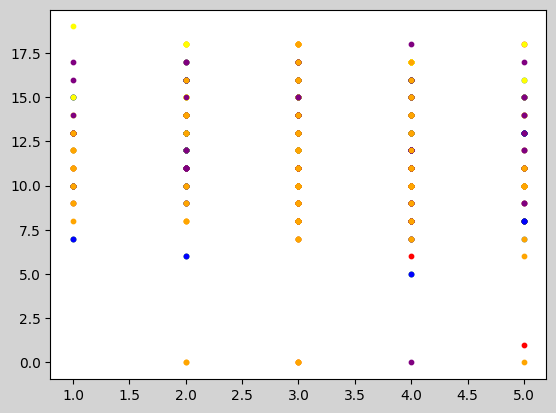

In [27]:
#Q1
plt.figure(facecolor="lightgray")
plt.scatter(x=student_data.loc[1:100,"freetime"],y=student_data.loc[1:100,"G3"], s=10)
plt.scatter(x=student_data.loc[100:200,"freetime"],y=student_data.loc[100:200,"G3"], s=10 ,c="red")
plt.scatter(x=student_data.loc[200:300,"freetime"],y=student_data.loc[200:300,"G3"], s=10 ,c="green")
plt.scatter(x=student_data.loc[200:300,"freetime"],y=student_data.loc[200:300,"G3"], s=10, c="blue")
plt.scatter(x=student_data.loc[300:400,"freetime"],y=student_data.loc[300:400,"G3"], s=10 ,c="yellow")
plt.scatter(x=student_data.loc[400:500,"freetime"],y=student_data.loc[400:500,"G3"], s=10 ,c="purple")
plt.scatter(x=student_data.loc[500:600,"freetime"],y=student_data.loc[500:600,"G3"], s=10 ,c="orange")
plt.show()

<ipython-input-28-006881441021>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="address", y="Medu", data=student_data, inner="box", palette="pastel")


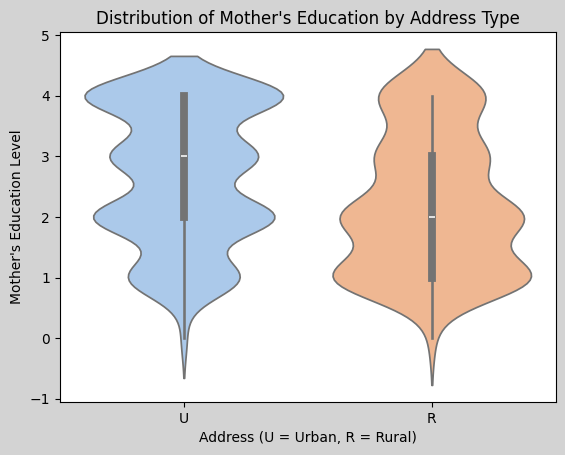

In [28]:
#Q2

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(facecolor="lightgray")
sns.violinplot(x="address", y="Medu", data=student_data, inner="box", palette="pastel")
plt.title("Distribution of Mother's Education by Address Type")
plt.xlabel("Address (U = Urban, R = Rural)")
plt.ylabel("Mother's Education Level")
plt.show()

Text(0.5, 1.0, 'Travel Time vs Absences')

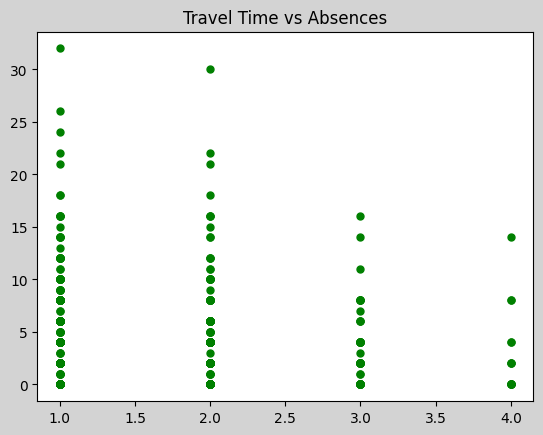

In [29]:
#Q3
import matplotlib.pyplot as plt
plt.figure(facecolor="lightgray")
plt.plot(student_data['traveltime'],student_data['absences'],'o', markersize=5, color='green')

plt.title('Travel Time vs Absences')

<ipython-input-30-5c59750474f2>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  student_data["hpeace_score"] = student_data["famrel"] + student_data["Pstatus"].replace({"T": 1, "A": 0})
<ipython-input-30-5c59750474f2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="hpeace_score", y="Dalc",data=student_data, inner="box", palette="pastel")


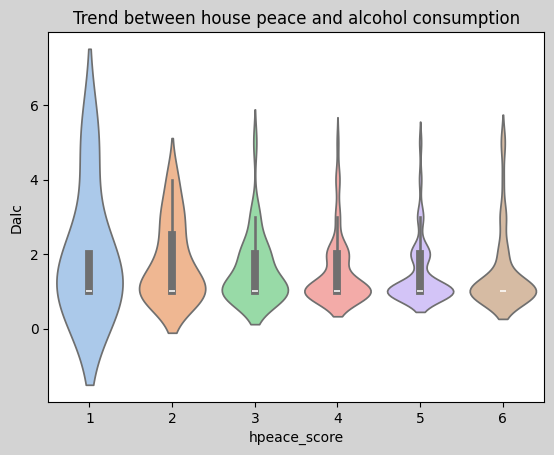

In [30]:
#Q4
#For this we make a new column call it hpeace_score which will signify house peace score.
#If Pstatus is together("T"=1) or Pstatus is apart("A"=0) .
# We will add this number to famrel to get the hpeace_score.
student_data["hpeace_score"] = student_data["famrel"] + student_data["Pstatus"].replace({"T": 1, "A": 0})
#Now we can plot hpeace_score against Dalc
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(facecolor="lightgray")
sns.violinplot(x="hpeace_score", y="Dalc",data=student_data, inner="box", palette="pastel")
plt.title("Trend between house peace and alcohol consumption")
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

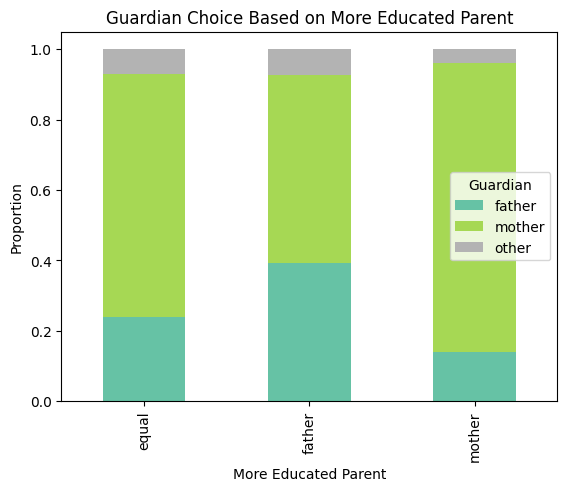

In [31]:
#Q5
def get_more_educated_parent(row):
    if row['Medu'] > row['Fedu']:
        return 'mother'
    elif row['Fedu'] > row['Medu']:
        return 'father'
    else:
        return 'equal'

student_data['more_educated'] = student_data.apply(get_more_educated_parent, axis=1)

import matplotlib.pyplot as plt
plt.figure(facecolor="lightblue")
plt.figure(facecolor="lightgray")

cross_tab = pd.crosstab(student_data['more_educated'], student_data['guardian'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Guardian Choice Based on More Educated Parent')
plt.xlabel('More Educated Parent')
plt.ylabel('Proportion')
plt.legend(title='Guardian')
plt.show()


-----------------------------------------------------------------------------------TASK 4-------------------------------------------------------------------------------------

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [33]:
df = student_data.copy()
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})
X = df.drop(columns=['romantic'])
y = df['romantic']
X = pd.get_dummies(X, drop_first=True)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
def evaluate_model(name, y_true, y_pred):
    print(f"----- {name} -----")
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall   :", round(recall_score(y_true, y_pred), 4))
    print("F1 Score :", round(f1_score(y_true, y_pred), 4))
    print()


In [36]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
evaluate_model("Logistic Regression", y_test, lr.predict(X_test_scaled))
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree", y_test, dt.predict(X_test))
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest", y_test, rf.predict(X_test))
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
evaluate_model("K-Nearest Neighbors", y_test, knn.predict(X_test_scaled))
# Support Vector Machine
svm = SVC()
svm.fit(X_train_scaled, y_train)
evaluate_model("Support Vector Machine", y_test, svm.predict(X_test_scaled))


----- Logistic Regression -----
Accuracy : 0.5538
Precision: 0.3784
Recall   : 0.2857
F1 Score : 0.3256

----- Decision Tree -----
Accuracy : 0.5846
Precision: 0.4528
Recall   : 0.4898
F1 Score : 0.4706

----- Random Forest -----
Accuracy : 0.6077
Precision: 0.45
Recall   : 0.1837
F1 Score : 0.2609

----- K-Nearest Neighbors -----
Accuracy : 0.5923
Precision: 0.4286
Recall   : 0.2449
F1 Score : 0.3117

----- Support Vector Machine -----
Accuracy : 0.6
Precision: 0.3636
Recall   : 0.0816
F1 Score : 0.1333



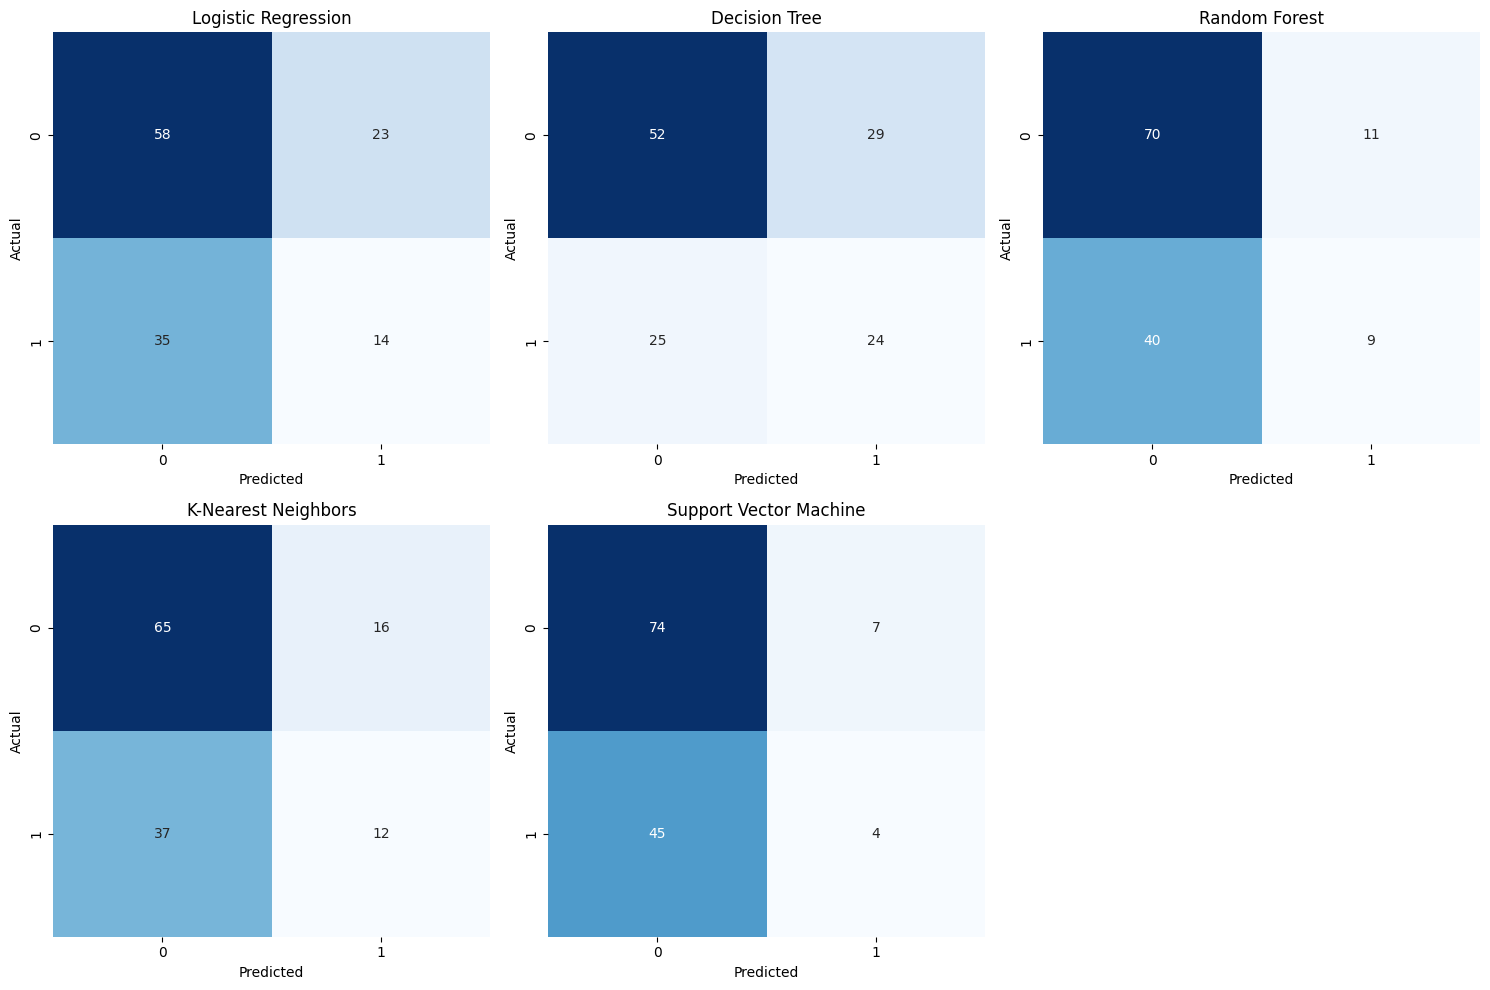

In [37]:
y_preds = {
    "Logistic Regression": lr.predict(X_test_scaled),
    "Decision Tree": dt.predict(X_test),
    "Random Forest": rf.predict(X_test),
    "K-Nearest Neighbors": knn.predict(X_test_scaled),
    "Support Vector Machine": svm.predict(X_test_scaled)
}

# Plot confusion matrices
plt.figure(figsize=(15, 10))

for i, (name, y_pred) in enumerate(y_preds.items(), 1):
    plt.subplot(2, 3, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------------TASK 5-------------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


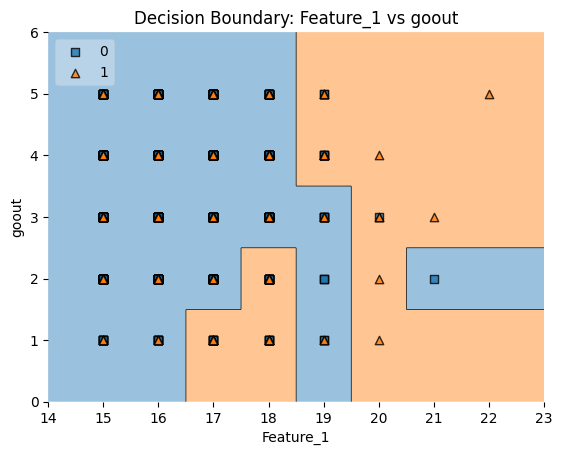

In [38]:
%pip install mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(student_data['romantic'])  # 1 = yes, 0 = no
X_boundary = student_data[['Feature_1', 'goout']]
clf_boundary = RandomForestClassifier(random_state=42)
clf_boundary.fit(X_boundary, y_encoded)
plot_decision_regions(X_boundary.values, y_encoded, clf=clf_boundary, legend=2)
plt.xlabel('Feature_1')
plt.ylabel('goout')
plt.title('Decision Boundary: Feature_1 vs goout')
plt.show()

Decision Boundary Interpretation


We observed:
- Higher values of `Feature_1` and `goout` tend to fall into the “Yes” region.
- Students with low social activity and lower `Feature_1` values are predicted as “No”.
- The jagged edges of the boundary reflect how the Random Forest splits feature space into rectangles based on decision thresholds.

In [39]:
!pip install shap

In [41]:
from sklearn.preprocessing import LabelEncoder
data_encoded = student_data.copy()
label_encoders = {}
for column in data_encoded.columns:
    if data_encoded[column].dtype == 'object':
        le = LabelEncoder()
        data_encoded[column] = le.fit_transform(data_encoded[column])
        label_encoders[column] = le


In [42]:
X = data_encoded.drop(columns=['romantic'])  # Only features, already encoded
y = data_encoded['romantic']                # Already encoded (0/1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

<Figure size 640x480 with 0 Axes>

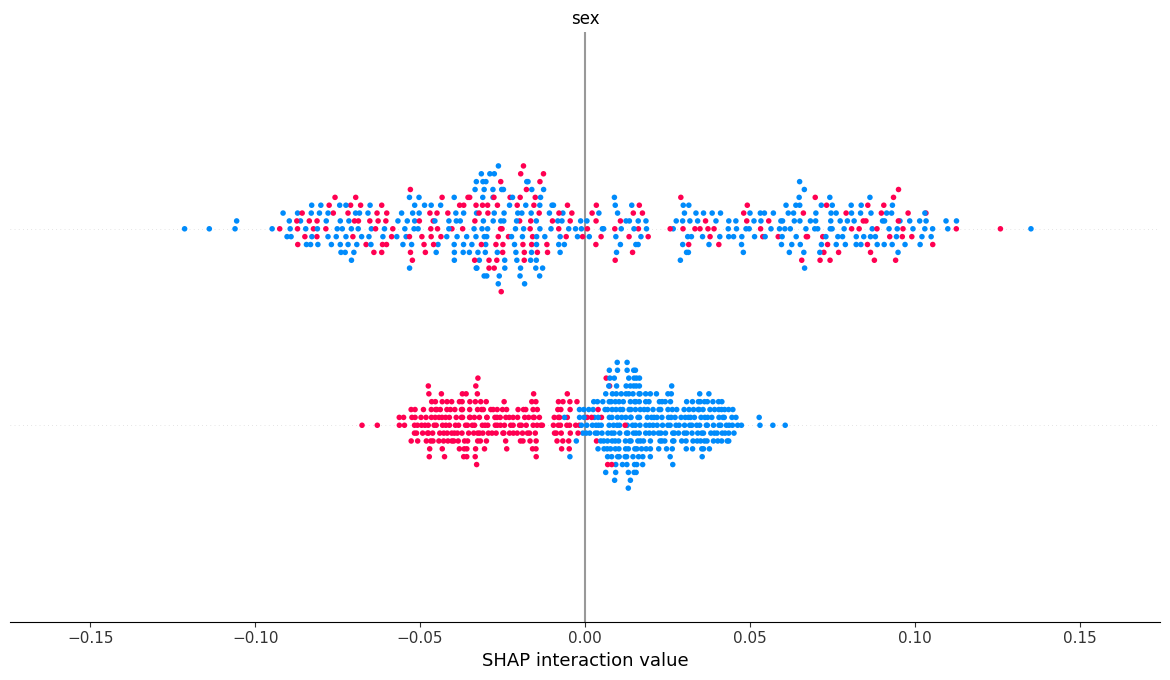

In [43]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

In [ ]:
# Get one sample of each prediction class
y_pred = model.predict(X_test)
yes_index = int(list(y_pred).index(1))
no_index = int(list(y_pred).index(0))

# Extract shap values for the instances
yes_shap = shap_values[1][yes_index]
no_shap = shap_values[1][no_index]

# Extract raw features for those instances
yes_features = X_test.iloc[yes_index].values
no_features = X_test.iloc[no_index].values

# Visualize in Colab
shap.initjs()

# Local explanation for Yes
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=yes_shap,
    features=yes_features,
    feature_names=X_test.columns
)

# Local explanation for No
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=no_shap,
    features=no_features,
    feature_names=X_test.columns
)